<a href="https://colab.research.google.com/github/TinizaraRodriguez/_easyOCR_paddleOCR/blob/main/easyOCR%2BpaddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr
!pip install paddlepaddle paddleocr
!pip install opencv-python
!pip install paddlepaddle-gpu
!pip install paddleocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 114.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.0/541.0 MB 3.2 MB/s eta 0:00:00


In [2]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import re
import regex
from PIL import Image
from google.colab.patches import cv2_imshow

In [3]:
IMAGE_PATH = '/content/pantalan2_cerca.jpeg'
reader = easyocr.Reader(['es'])
result = reader.readtext(IMAGE_PATH)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[1921, 57], [1991, 57], [1991, 97], [1921, 97]], '800', 0.9921262591978149),
 ([[1038, 249], [1283, 249], [1283, 289], [1038, 289]],
  '79-TE-3-367-97',
  0.6767754997524651),
 ([[2058, 440], [2155, 440], [2155, 493], [2058, 493]],
  'TR',
  0.9973272512912397),
 ([[0, 970], [30, 970], [30, 1002], [0, 1002]], '008', 0.9304882385572828),
 ([[1250, 1060], [1296, 1060], [1296, 1086], [1250, 1086]],
  '220',
  0.24058796309083344),
 ([[1515, 1277], [1555, 1277], [1555, 1313], [1515, 1313]],
  'GC',
  0.8650706874320667),
 ([[1924, 1356], [1960, 1356], [1960, 1382], [1924, 1382]],
  'GC',
  0.9589649388318137),
 ([[1996, 1358], [2038, 1358], [2038, 1384], [1996, 1384]],
  '222',
  0.9999832065931312),
 ([[2048, 1358], [2078, 1358], [2078, 1384], [2048, 1384]],
  '06',
  0.9997357494871242),
 ([[1770.930985278494, 70.44816761268697],
   [1921.6650082918216, 57.20063965886881],
   [1923.069014721506, 101.55183238731303],
   [1772.3349917081784, 114.79936034113119]],
  'NOBMAAM',
  0.172947

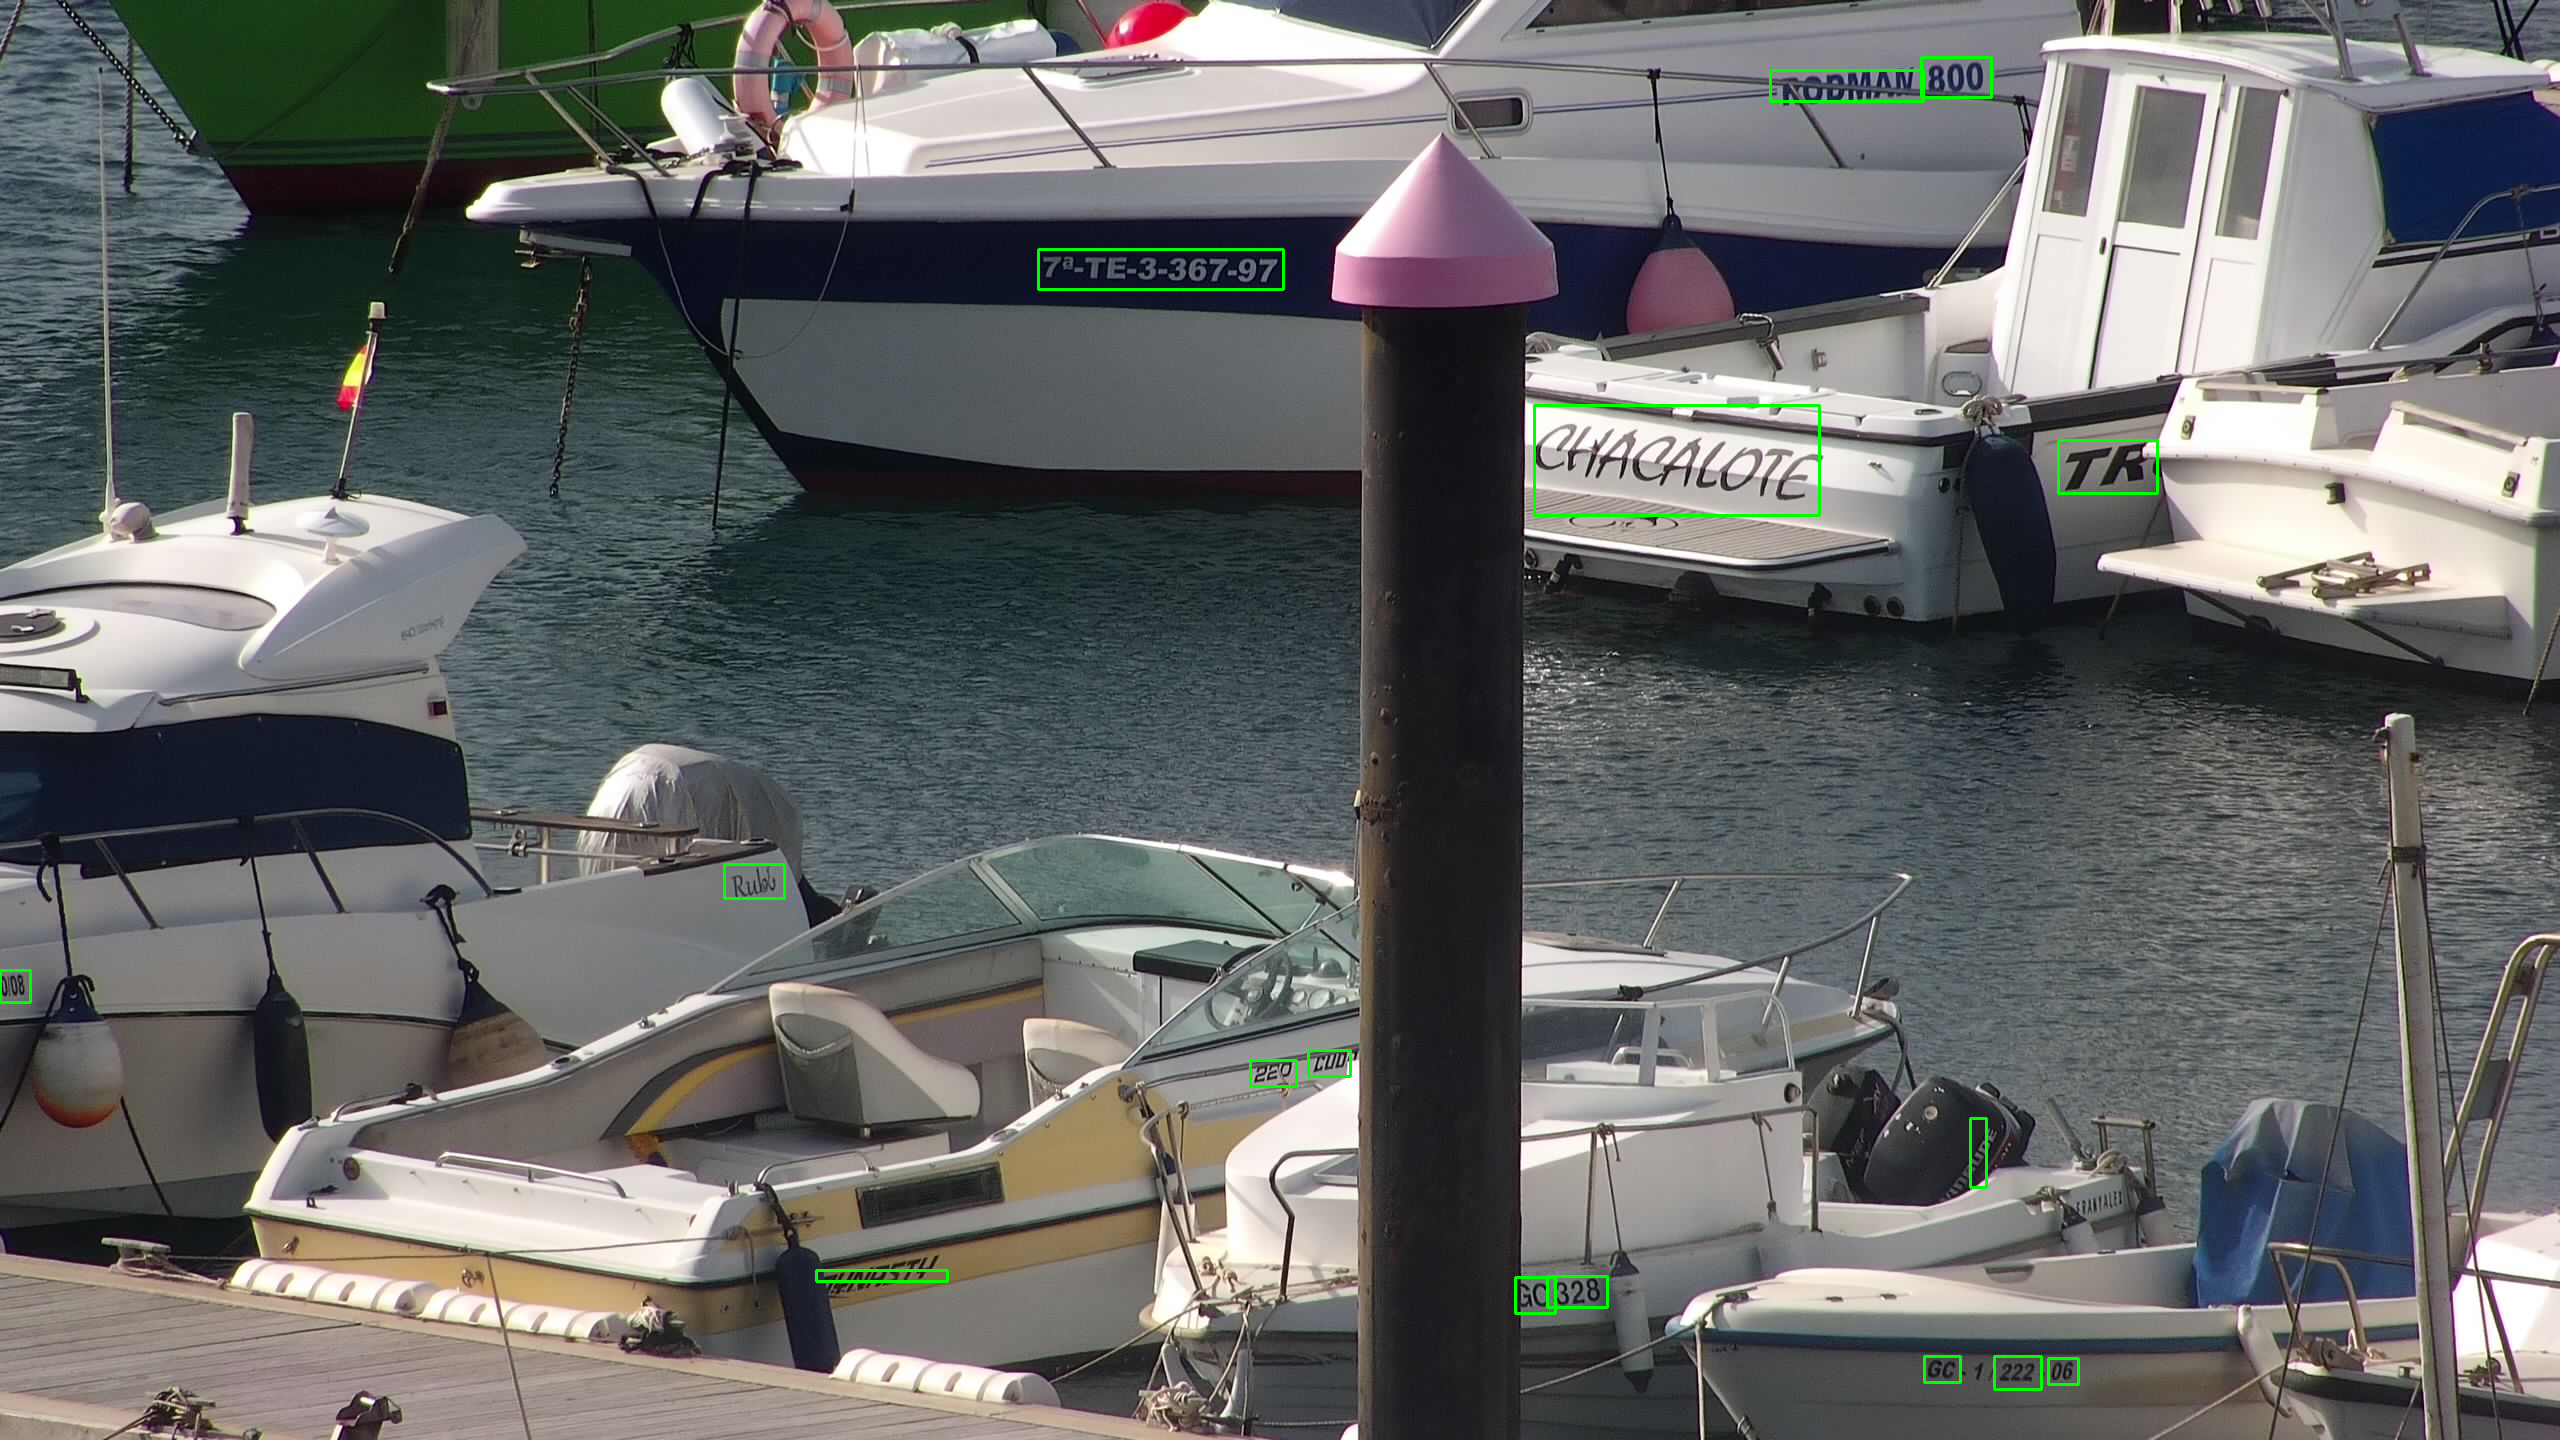

In [4]:
import cv2
import os

# tamaño minimo de las imagenes
min_desired_size = (200, 50)

# cargamos la imagen
img = cv2.imread(IMAGE_PATH)

# verificamos si la carga se ha cargado correctamente
if img is None:
    print("Error: No se pudo cargar la imagen.")
else:
    # deteccion del texto
    results = reader.readtext(img)

    # carpeta donde guardaremos el resultado
    output_folder = '/content/outputs'

    # verificar el directorio
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # contador para el nombre de las imagenes
    image_count = 1

    # iteramos sobre el resultados
    for (bbox, text, prob) in results:
        # obtenemos las coordenadas
        top_left, top_right, bottom_right, bottom_left = bbox

        # convertir las coordenadas a enteros
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        # dibuja el recuadro
        cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

        # recorta la region
        text_region = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

        if not text_region is None and not text_region.size == 0:
            # verifica si el tamaño es superior o igual al minimo
            if text_region.shape[0] < min_desired_size[1] or text_region.shape[1] < min_desired_size[0]:
                # redimension de la region al tamaño dado
                text_region = cv2.resize(text_region, min_desired_size)

            # guarda los crops en la carpeta indicad y con el nombre indicado
            output_filename = os.path.join(output_folder, f'output-{image_count}.jpg')
            cv2.imwrite(output_filename, text_region)
            image_count += 1

    # muestra la imagen final con los recuadros
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [11]:
import cv2
import os

# carpeta de imagenes de entrada
input_folder = '/content/outputs'

# carpeta con las imagenes mejoradas
output_folder = '/content/outputs_improved'

# verificamos si existe, sino se crea
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# obtenemos la lista de los archivos
image_files = [os.path.join(input_folder, filename) for filename in os.listdir(input_folder) if filename.endswith(('.jpeg', '.jpg', '.png'))]

# mejora la calidad de la imagen
def improve_image_quality(image):
    # aplicamos escala de gris
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # aplicamos contraste
    improved_image = cv2.equalizeHist(gray_image)

    return improved_image

# procesamos las imagenes
for img_path in image_files:
    # cargamos la imagen
    image = cv2.imread(img_path)

    # si no es None
    if image is not None:
        # llamamos al metodo anterior para mejorar la calidad
        improved_image = improve_image_quality(image)

        # guardamos la imagen en la carpeta de salida
        output_path = os.path.join(output_folder, os.path.basename(img_path))
        cv2.imwrite(output_path, improved_image)

        print(f'Imagen mejorada guardada en: {output_path}')
    else:
        print(f"Error: No se pudo cargar la imagen {img_path}")

# cerramos la ventana
cv2.destroyAllWindows()



Imagen mejorada guardada en: /content/outputs_improved/output-5.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-8.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-4.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-14.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-10.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-11.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-9.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-1.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-12.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-7.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-2.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-13.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-6.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-3.jpg
Imagen mejorada guardada en: /content/outpu